# Interpolation and Differentiation

All algorithms use the baryentric weights as described in the book "Implementing Spectral Methods for PDEs" by David Kopriva.

- Interpolation can be performed either with `interpolate(dest, u, basis)` or via an 
  `interpolation_matrix(dest, basis)`.
- In a nodal basis, the derivative matrix is available as `basis.D`. Alternatively, `derivative_at(x, u, basis)`
  can be used.

LobattoLegendre{Float64}: Nodal Lobatto Legendre basis of degree 5


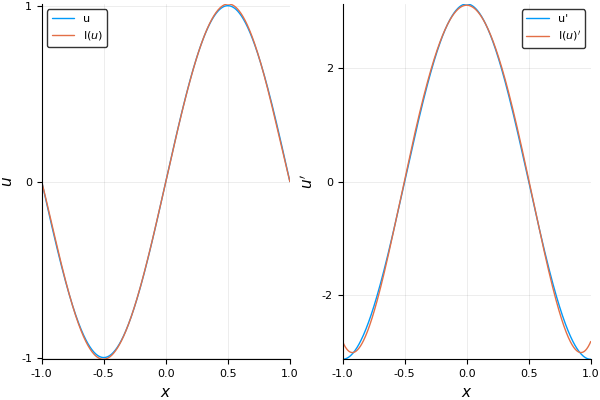

GaussLegendre{Float64}: Nodal Gauss Legendre basis of degree 5


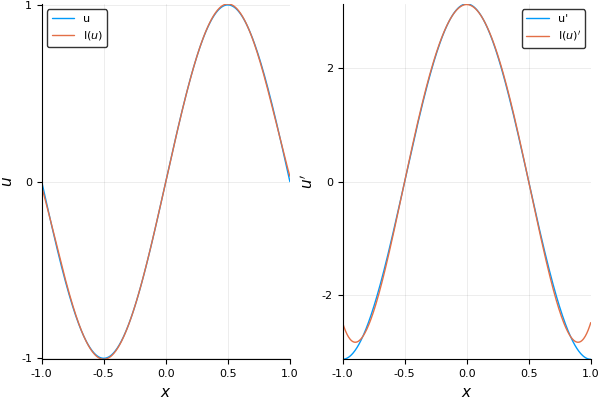

In [44]:
using Revise
using PolynomialBases
using LaTeXStrings, Plots; pyplot()

# define nodal bases
p = 5 # polynomial degree
basis1 = LobattoLegendre(p)
basis2 = GaussLegendre(p)

# the function that will be interpolated
ufunc(x) = sinpi(x); uprim(x) = π*cospi(x)
#ufunc(x) = 1 / (1 + 25x^2); uprim(x) = -ufunc(x)^2*50x

for basis in (basis1, basis2)
    u = ufunc.(basis.nodes)

    xplot = linspace(-1, 1, 500)
    uplot = interpolate(xplot, u, basis)

    fig1 = plot(xplot, ufunc.(xplot), label="u", xguide=L"x", yguide=L"u")
    plot!(fig1, xplot, uplot, label=L"\mathrm{I}(u)")

    fig2 = plot(xplot, uprim.(xplot), label="u'", xguide=L"x", yguide=L"u'")
    plot!(fig2, xplot, interpolate(xplot, basis.D*u, basis), label=L"\mathrm{I}(u)'")

    display(basis)
    display(plot(fig1, fig2))
end

# Integration

The nodes and weights are from [FastGaussQuadrature.jl](https://github.com/ajt60gaibb/FastGaussQuadrature.jl).


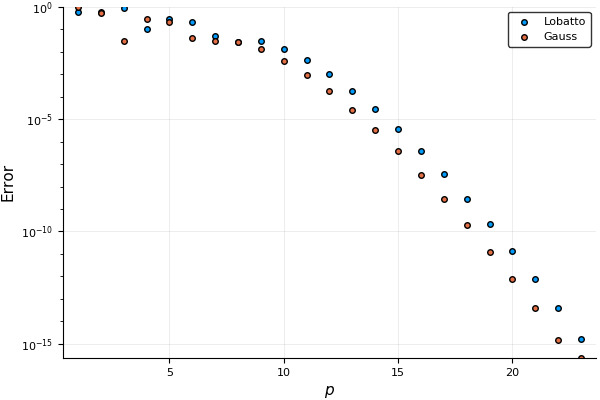

In [43]:
using Revise
using PolynomialBases
using LaTeXStrings, Plots; pyplot()

ufunc(x) = sinpi(x)^6

function compute_error(p, basis_type)
    basis = basis_type(p)
    u = ufunc.(basis.nodes)
    abs(5/8 - integrate(u, basis))
end

ps = 1:23
scatter(ps, compute_error.(ps, LobattoLegendre), label="Lobatto", xguide=L"p", yguide="Error", yaxis=:log10)
scatter!(ps, compute_error.(ps, GaussLegendre), label="Gauss")